In [62]:
import pandas as pd
from PIL import Image
import numpy as np
import shutil
import os
import matplotlib.pyplot as plt

# im size : (800, 1360)

--------- 0 ----------
(800, 1360, 3)
--------- 1 ----------
(800, 1360, 3)
--------- 2 ----------
(800, 1360, 3)
--------- 3 ----------
(800, 1360, 3)
--------- 4 ----------
(800, 1360, 3)
--------- 5 ----------
(800, 1360, 3)
--------- 6 ----------
(800, 1360, 3)
--------- 7 ----------
(800, 1360, 3)
--------- 8 ----------
(800, 1360, 3)
--------- 9 ----------
(800, 1360, 3)


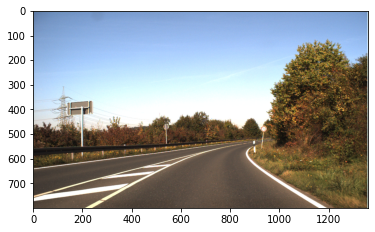

In [63]:
for i in range(10):
    im = np.asarray(Image.open(f"data/FullIJCNN2013/0000{i}.ppm"))
    print(f"--------- {i} ----------")
    print(im.shape)
plt.imshow(im)

# dataの変形
> file_nameからbboxなどを取り出す

In [64]:
with open("data/FullIJCNN2013/gt.txt") as f:
    rows = f.read().split("\n")
print(len(rows))
print(type(rows))

df = pd.DataFrame(rows, columns=["file_name"])
print(df["file_name"][0].split(";"))

images = []
bbox = []
class_ = []

for i in range(df.shape[0]):
    images.append(df["file_name"][i].split(";")[0])
    bbox.append(df["file_name"][i].split(";")[1:5])
    class_.append(df["file_name"][i].split(";")[-1])

data_list = list(zip(rows, images, bbox, class_))
df = pd.DataFrame(data_list, columns=["file_name", "image_name", "bbox", "class"])
print(df.shape)
df.head()

1214
<class 'list'>
['00000.ppm', '774', '411', '815', '446', '11']
(1214, 4)


,file_name,image_name,bbox,class
0,00000.ppm;774;411;815;446;11,00000.ppm,"[774, 411, 815, 446]",11
1,00001.ppm;983;388;1024;432;40,00001.ppm,"[983, 388, 1024, 432]",40
2,00001.ppm;386;494;442;552;38,00001.ppm,"[386, 494, 442, 552]",38
3,00001.ppm;973;335;1031;390;13,00001.ppm,"[973, 335, 1031, 390]",13
4,00002.ppm;892;476;1006;592;39,00002.ppm,"[892, 476, 1006, 592]",39


# 各クラスの枚数の確認

In [65]:
for i in range(1, 43):
    print(f"class {i} : ", df[df["class"] == str(i)].shape)

class 1 :  (79, 4)
class 2 :  (81, 4)
class 3 :  (30, 4)
class 4 :  (68, 4)
class 5 :  (53, 4)
class 6 :  (19, 4)
class 7 :  (41, 4)
class 8 :  (57, 4)
class 9 :  (41, 4)
class 10 :  (80, 4)
class 11 :  (38, 4)
class 12 :  (85, 4)
class 13 :  (83, 4)
class 14 :  (32, 4)
class 15 :  (15, 4)
class 16 :  (8, 4)
class 17 :  (29, 4)
class 18 :  (38, 4)
class 19 :  (2, 4)
class 20 :  (9, 4)
class 21 :  (5, 4)
class 22 :  (13, 4)
class 23 :  (20, 4)
class 24 :  (5, 4)
class 25 :  (31, 4)
class 26 :  (18, 4)
class 27 :  (3, 4)
class 28 :  (14, 4)
class 29 :  (5, 4)
class 30 :  (16, 4)
class 31 :  (2, 4)
class 32 :  (8, 4)
class 33 :  (16, 4)
class 34 :  (12, 4)
class 35 :  (20, 4)
class 36 :  (9, 4)
class 37 :  (2, 4)
class 38 :  (88, 4)
class 39 :  (6, 4)
class 40 :  (10, 4)
class 41 :  (7, 4)
class 42 :  (11, 4)


In [86]:
use_class = [9, 11, 12, 13, 15, 16, 18, 21, 24]
sum = []

for i in use_class:
    print(f"class {i} : ", df[df["class"] == str(i)].shape)


class 9 :  (41, 4)
class 11 :  (38, 4)
class 12 :  (85, 4)
class 13 :  (83, 4)
class 15 :  (15, 4)
class 16 :  (8, 4)
class 18 :  (38, 4)
class 21 :  (5, 4)
class 24 :  (5, 4)


<AxesSubplot:xlabel='class'>

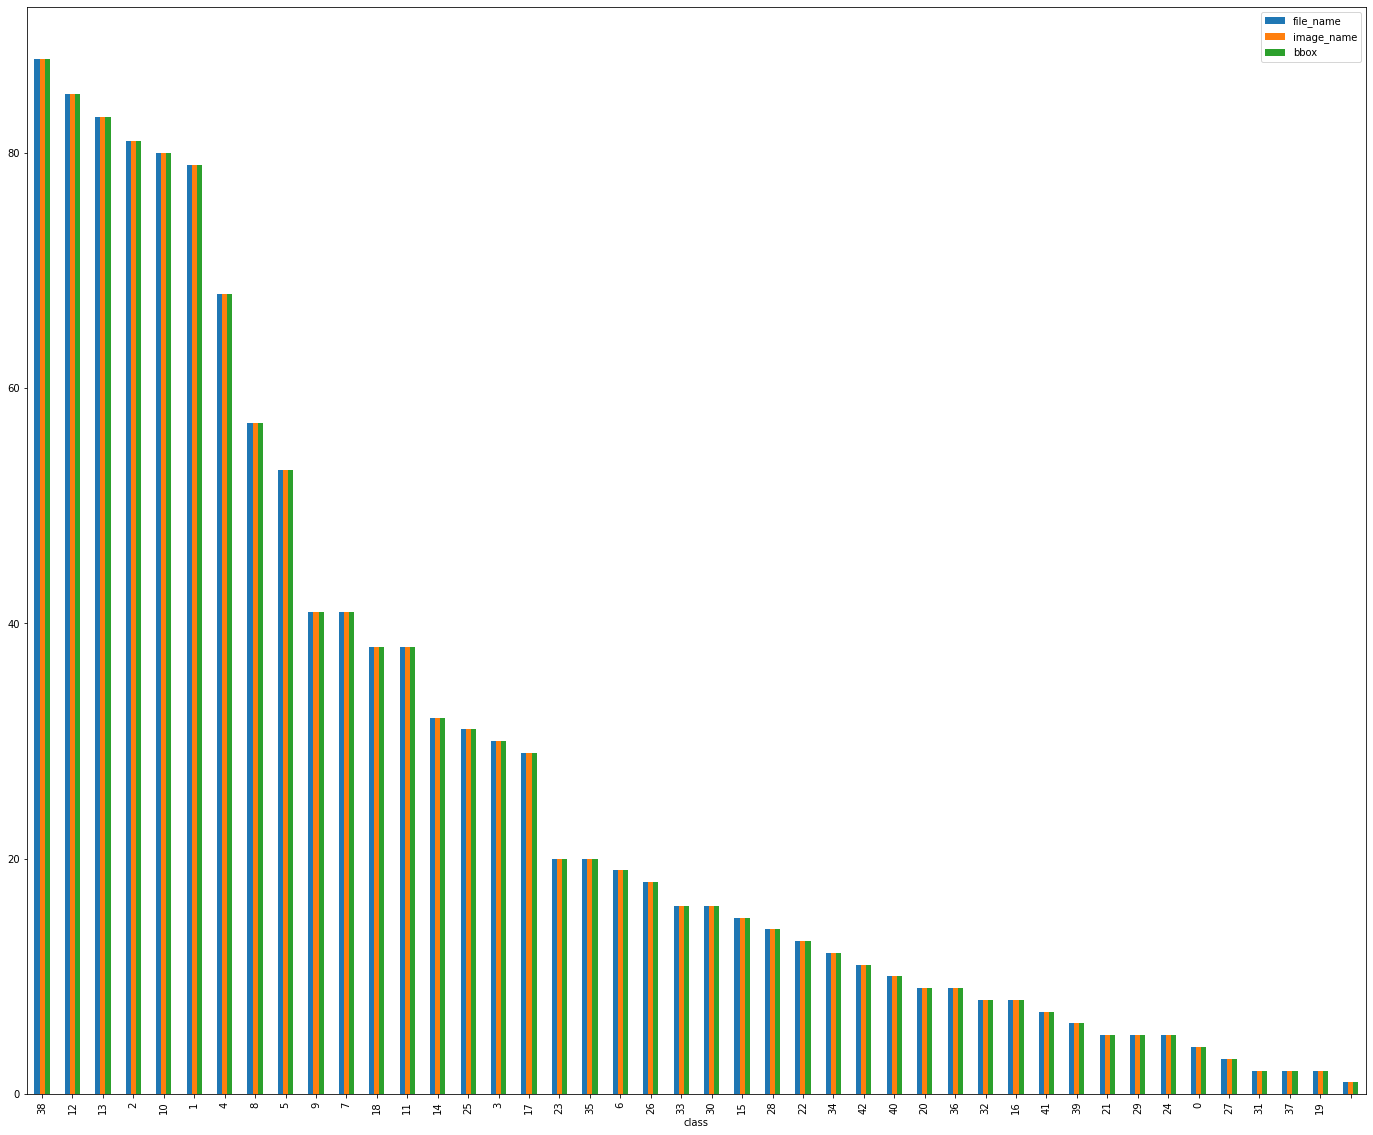

In [66]:
# plt.figure()
class_df = df.groupby("class").count().sort_values("file_name", ascending=False)
class_df.plot.bar(figsize=(24, 20))
# plt.savefig("class_num.png")
# plt.close()

# データの移動

In [67]:
# groundtruthを作る関数
# 9, 11, 12, 13, 15, 16, 18, 21, (23) , 24, (25,) (26) (30)
def write_gt(df, idx):
    data = df.iloc[idx]
    im_name = data["image_name"]
    bbox = data["bbox"]
    clas = int(data["class"])

    # class のフォルダがなければ作成
    # dir = f"data/Sign/class_{clas}"
    # os.makedirs(dir, exist_ok=True)

    # (9, 13, 15) -> (0, 1, 2)
    # if clas == 9:
    #     clas = 0
    # elif clas == 13:
    #     clas = 1
    # elif clas == 15:
    #     clas = 2

    # 9, 11, 12 13 15, 16, 18, 21, 24 -> 0, 1, 2, 3, 4, 5, 6, 7, 8
    if   clas == 9:  clas = 0;
    elif clas == 11: clas = 1;
    elif clas == 12: clas = 2;
    elif clas == 13: clas = 3;
    elif clas == 15: clas = 4;
    elif clas == 16: clas = 5;
    elif clas == 18: clas = 6;
    elif clas == 21: clas = 7;
    elif clas == 24: clas = 8;

    ULx = int(bbox[0])
    ULy = int(bbox[1])
    BRx = int(bbox[2])
    BRy = int(bbox[3])

    # mid = [((ULx+BRx)/2)/1600, ((ULy+BRy)/2)/800]
    # wid = (BRx - ULx)/1600
    # hei = (BRy - ULy)/800

    mid = [((ULx+BRx)/2)/1360, ((ULy+BRy)/2)/800]
    wid = (BRx - ULx)/1360
    hei = (BRy - ULy)/800

    text = f"{clas} {mid[0]} {mid[1]} {wid} {hei}"

    txt_name = im_name.split(".")[0]
    text_path = f"data/Sign/all_data/{txt_name}.txt"
    exist_file = os.path.isfile(text_path)

    if exist_file:
        print("exist file -- index: ", index)
        with open(text_path, mode="a") as f:
            f.write("\n")
            f.write(text)
    else:
        with open(text_path, "w") as f:
            f.write(text)

# write_gt(df, 3)

In [68]:
df.head()

,file_name,image_name,bbox,class
0,00000.ppm;774;411;815;446;11,00000.ppm,"[774, 411, 815, 446]",11
1,00001.ppm;983;388;1024;432;40,00001.ppm,"[983, 388, 1024, 432]",40
2,00001.ppm;386;494;442;552;38,00001.ppm,"[386, 494, 442, 552]",38
3,00001.ppm;973;335;1031;390;13,00001.ppm,"[973, 335, 1031, 390]",13
4,00002.ppm;892;476;1006;592;39,00002.ppm,"[892, 476, 1006, 592]",39


In [69]:
# 9, 11, 12 13 15, 16, 18, 21, 24 
# use_class = [9, 13, 15]
use_class = [9, 11, 12, 13, 15, 16, 18, 21, 24]
bf_path = "data/FullIJCNN2013/"
af_path = "data/Sign/all_data/"
count = 0

for c in use_class:
    im_name_list = list(df[df["class"] == str(c)]["image_name"]) # XXX.ppmのリスト
    im_index = df[df["class"] == str(c)]["image_name"].index
    for idx, im in enumerate(im_name_list):
        # im: XXX.ppm
        count += 1
        index = im_index[idx]
        write_gt(df, index)
        shutil.copy(os.path.join(bf_path, im), os.path.join(af_path, im))
print("count : ", count)

exist file -- index:  112
exist file -- index:  246
exist file -- index:  417
exist file -- index:  844
exist file -- index:  1138
exist file -- index:  408
exist file -- index:  237
exist file -- index:  144
exist file -- index:  145
exist file -- index:  146
exist file -- index:  158
exist file -- index:  161
exist file -- index:  329
exist file -- index:  368
exist file -- index:  587
exist file -- index:  712
exist file -- index:  732
exist file -- index:  738
exist file -- index:  759
exist file -- index:  907
exist file -- index:  940
exist file -- index:  1011
exist file -- index:  1046
exist file -- index:  1055
exist file -- index:  1073
exist file -- index:  1079
exist file -- index:  1091
exist file -- index:  224
exist file -- index:  381
exist file -- index:  537
exist file -- index:  152
exist file -- index:  763
exist file -- index:  306
exist file -- index:  376
exist file -- index:  432
exist file -- index:  484
exist file -- index:  650
exist file -- index:  654
exist

In [70]:
df.iloc[112]

file_name     00073.ppm;432;475;452;495;9
image_name                      00073.ppm
bbox                 [432, 475, 452, 495]
class                                   9
Name: 112, dtype: object

In [71]:
df[df["class"] == str(15)]

,file_name,image_name,bbox,class
43,00029.ppm;1091;393;1133;436;15,00029.ppm,"[1091, 393, 1133, 436]",15
80,00053.ppm;1156;333;1196;372;15,00053.ppm,"[1156, 333, 1196, 372]",15
223,00138.ppm;157;179;235;268;15,00138.ppm,"[157, 179, 235, 268]",15
224,00138.ppm;1302;399;1336;432;15,00138.ppm,"[1302, 399, 1336, 432]",15
381,00242.ppm;848;388;870;413;15,00242.ppm,"[848, 388, 870, 413]",15
510,00318.ppm;631;451;657;477;15,00318.ppm,"[631, 451, 657, 477]",15
523,00334.ppm;323;452;369;498;15,00334.ppm,"[323, 452, 369, 498]",15
536,00343.ppm;802;531;829;558;15,00343.ppm,"[802, 531, 829, 558]",15
537,00343.ppm;483;507;512;536;15,00343.ppm,"[483, 507, 512, 536]",15
828,00545.ppm;213;435;247;474;15,00545.ppm,"[213, 435, 247, 474]",15


# うつせているか確認

In [72]:
sum_origin = 0
# use_class = [9, 13, 15]
use_class = [9, 11, 12, 13, 15, 16, 18, 21, 24]

for c in use_class:
    sum_origin += int(df[df["class"] == str(c)].shape[0])

print("sum_origin : ", sum_origin)

af_sum = 0
dir = "data/Sign/all_data/"
print(sum(os.path.isfile(os.path.join(dir, name)) for name in os.listdir(dir)))

sum_origin :  318
544


# クラスごとにtrainとvalとtestに8:1:1で分割

In [73]:
# use_class = [9, 13, 15]
use_class = [9, 11, 12, 13, 15, 16, 18, 21, 24]

for cl in use_class:
    num = np.array(df[df["class"] == str(cl)].index) # index
    np.random.shuffle(num) # シャッフル

    index_num = num.shape[0]
    if index_num <= 10:
        train_num = int(index_num * 0.8) - 1
        valid_num = max(int(index_num * 0.1), 1)
        train_id = list(num[:train_num])
        valid_id = list(num[train_num:train_num+valid_num])
        test_id = list(num[train_num+valid_num:])
    else:
        train_num = int(index_num * 0.8)
        valid_num = int(index_num * 0.1) + 1
        train_id = list(num[:train_num])
        valid_id = list(num[train_num:train_num+valid_num])
        test_id = list(num[train_num+valid_num:])


    print("train ; ", len(train_id))
    print("val : ", len(valid_id))
    print("test : ", len(test_id))

    if   cl == 9:  cls = 0;
    elif cl == 11: cls = 1;
    elif cl == 12: cls = 2;
    elif cl == 13: cls = 3;
    elif cl == 15: cls = 4;
    elif cl == 16: cls = 5;
    elif cl == 18: cls = 6;
    elif cl == 21: cls = 7;
    elif cl == 24: cls = 8;
    
    # trainの移動
    for id in train_id:
        im_name = df.iloc[id]["image_name"].split(".")[0]
        im_path = f"data/Sign/all_data/{im_name}.ppm"
        txt_path = f"data/Sign/all_data/{im_name}.txt"

        dir_path = "data/Sign/train/"
        
        if os.path.isfile(im_path):
            shutil.copy(im_path, dir_path)
            shutil.copy(txt_path, dir_path)
            pass
        else:
            print("----- train -----")
            print("class" , cl)
            print("id", id)
            print(im_path)
            print("Error")
    
    # validationの移動
    for id in valid_id:
        im_name = df.iloc[id]["image_name"].split(".")[0]
        im_path = f"data/Sign/all_data/{im_name}.ppm"
        txt_path = f"data/Sign/all_data/{im_name}.txt"
        
        dir_path = "data/Sign/val/"

        if os.path.isfile(im_path):
            shutil.copy(im_path, dir_path)
            shutil.copy(txt_path, dir_path)
            pass
        else:
            print("----- val -----")
            print("class" , cl)
            print("id", id)
            
            print(im_path)
            print("Error")
    
    # testの移動
    for id in test_id:
        im_name = df.iloc[id]["image_name"].split(".")[0]
        im_path = f"data/Sign/all_data/{im_name}.ppm"
        txt_path = f"data/Sign/all_data/{im_name}.txt"
        
        dir_path = "data/Sign/test/"

        if os.path.isfile(im_path):
            shutil.copy(im_path, dir_path)
            shutil.copy(txt_path, dir_path)
            pass
        else:
            print("----- test -----")
            print("class" , cl)
            print("id", id)
            
            print(im_path)
            print("Error")

train ;  32
val :  5
test :  4
train ;  30
val :  4
test :  4
train ;  68
val :  9
test :  8
train ;  66
val :  9
test :  8
train ;  12
val :  2
test :  1
train ;  5
val :  1
test :  2
train ;  30
val :  4
test :  4
train ;  3
val :  1
test :  1
train ;  3
val :  1
test :  1


In [74]:
df.iloc[43]

file_name     00029.ppm;1091;393;1133;436;15
image_name                         00029.ppm
bbox                  [1091, 393, 1133, 436]
class                                     15
Name: 43, dtype: object

In [75]:
df[df["image_name"] == "00008.ppm"]

,file_name,image_name,bbox,class
13,00008.ppm;785;460;811;486;2,00008.ppm,"[785, 460, 811, 486]",2
14,00008.ppm;779;424;816;461;12,00008.ppm,"[779, 424, 816, 461]",12


In [76]:
df[df["class"] == str(15)]

,file_name,image_name,bbox,class
43,00029.ppm;1091;393;1133;436;15,00029.ppm,"[1091, 393, 1133, 436]",15
80,00053.ppm;1156;333;1196;372;15,00053.ppm,"[1156, 333, 1196, 372]",15
223,00138.ppm;157;179;235;268;15,00138.ppm,"[157, 179, 235, 268]",15
224,00138.ppm;1302;399;1336;432;15,00138.ppm,"[1302, 399, 1336, 432]",15
381,00242.ppm;848;388;870;413;15,00242.ppm,"[848, 388, 870, 413]",15
510,00318.ppm;631;451;657;477;15,00318.ppm,"[631, 451, 657, 477]",15
523,00334.ppm;323;452;369;498;15,00334.ppm,"[323, 452, 369, 498]",15
536,00343.ppm;802;531;829;558;15,00343.ppm,"[802, 531, 829, 558]",15
537,00343.ppm;483;507;512;536;15,00343.ppm,"[483, 507, 512, 536]",15
828,00545.ppm;213;435;247;474;15,00545.ppm,"[213, 435, 247, 474]",15


In [77]:
df.iloc[13]

file_name     00008.ppm;785;460;811;486;2
image_name                      00008.ppm
bbox                 [785, 460, 811, 486]
class                                   2
Name: 13, dtype: object

# ppmをpngに変換

In [78]:
import glob
from PIL import Image
from tqdm import tqdm

train_path = "data/Sign/train/"

train_ppm = glob.glob(train_path+"*.ppm")
for train in tqdm(train_ppm):
    # train : data/Sign/train/XXX.ppm
    im_name = train.split('/')[-1].split('.')[0] # XXX(.ppm)
    im = Image.open(train)
    save_name = train_path + im_name + ".png"
    im.save(save_name)
    # print(save_name)

100%|██████████| 225/225 [01:47<00:00,  2.08it/s]


In [79]:
val_path = "data/Sign/val/"
val_ppm = glob.glob(val_path+"*.ppm")

for val in tqdm(val_ppm):
    # train : data/Sign/train/XXX.ppm
    im_name = val.split('/')[-1].split('.')[0] # XXX(.ppm)
    im = Image.open(val)
    save_name = val_path + im_name + ".png"
    im.save(save_name)
    # print(save_name)

100%|██████████| 35/35 [00:16<00:00,  2.07it/s]


In [80]:
test_path = "data/Sign/test/"
test_ppm = glob.glob(test_path+"*.ppm")

for test in tqdm(test_ppm):
    # train : data/Sign/train/XXX.ppm
    im_name = test.split('/')[-1].split('.')[0] # XXX(.ppm)
    im = Image.open(test)
    save_name = test_path + im_name + ".png"
    im.save(save_name)
    # print(save_name)

100%|██████████| 33/33 [00:16<00:00,  2.05it/s]


# ppm削除

In [81]:
train_path = "data/Sign/train/"
train_ppm = glob.glob(train_path + "*.ppm")

for train in tqdm(train_ppm):
    # print(train)
    os.remove(train)

val_path = "data/Sign/val/"
val_ppm = glob.glob(val_path + "*.ppm")

for val in tqdm(val_ppm):
    os.remove(val)

test_path = "data/Sign/test/"
test_ppm = glob.glob(test_path + "*.ppm")

for test in tqdm(test_ppm):
    os.remove(test)




100%|██████████| 33/33 [00:00<00:00, 2825.08it/s]


In [82]:
df.head()

,file_name,image_name,bbox,class
0,00000.ppm;774;411;815;446;11,00000.ppm,"[774, 411, 815, 446]",11
1,00001.ppm;983;388;1024;432;40,00001.ppm,"[983, 388, 1024, 432]",40
2,00001.ppm;386;494;442;552;38,00001.ppm,"[386, 494, 442, 552]",38
3,00001.ppm;973;335;1031;390;13,00001.ppm,"[973, 335, 1031, 390]",13
4,00002.ppm;892;476;1006;592;39,00002.ppm,"[892, 476, 1006, 592]",39


1002.0
362.5


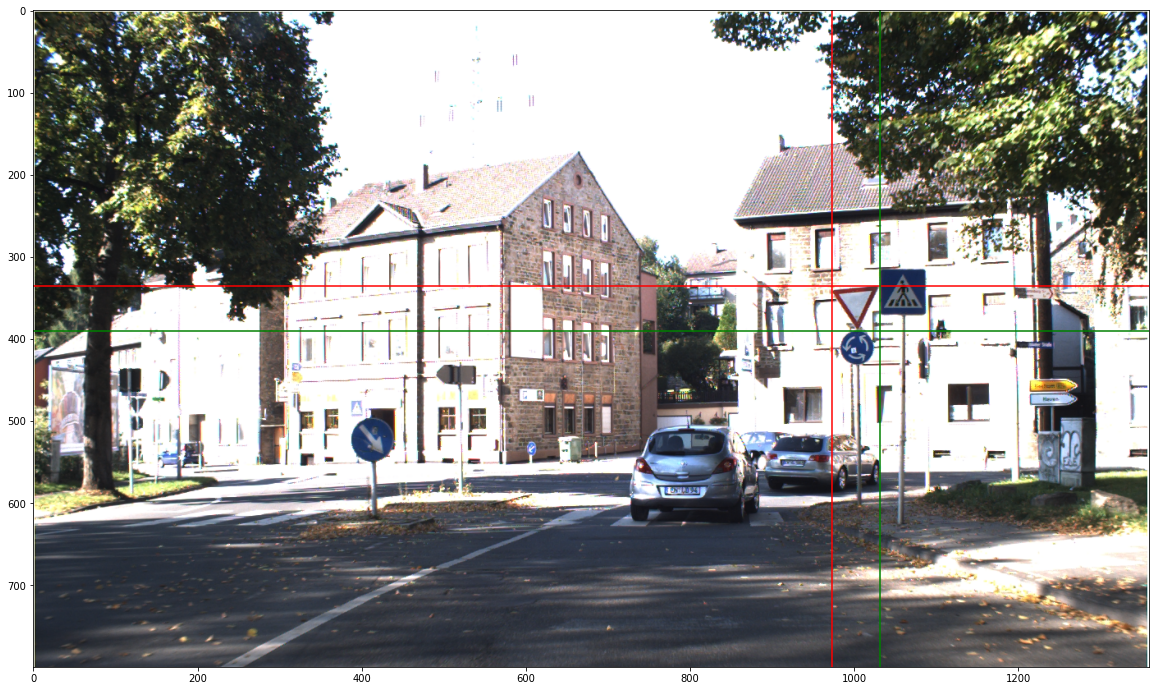

In [83]:
import cv2

# image = cv2.imread("/home/taku/Desktop/hack/yolov5/data/Sign/train/00001.png")
image = np.asarray(Image.open("/home/taku/Desktop/hack/yolov5/data/Sign/train/00001.png"))
bbox = df.iloc[1]["bbox"]


plt.figure(figsize=(20, 16))

plt.axvline(x=973, ymin=0, ymax=700, color="r")
plt.axhline(y=335, xmin=0, xmax=1200, color="r")

plt.axvline(x=1031, ymin=0, ymax=700, color="g")
plt.axhline(y=390, xmin=0, xmax=1200, color="g")

midx = (973 + 1031)/2
midy = (335 + 390)/2
print(midx)
print(midy)
wid = 1031 - 973
hei = 390 - 335
# plt.axvline(x=midx, ymin=0, ymax=700, color="r")
# plt.axhline(y=midy, xmin=973, xmax=973+wid, color="yellow")

plt.axvline(x=midx, ymin=335, ymax=335+hei, color="yellow")
plt.axhline(y=midy, xmin=973, xmax=973+wid, color="yellow")


plt.imshow(image)

In [14]:
import cv2

image = cv2.imread("runs/detect/exp5/00001.png", cv2.IMREAD_UNCHANGED)
anno_im = image.copy()

# 青色背景の表示
blu1 = (0, 0)
blu2 = (1360, 200)
blue = (255, 200, 80)
# cv2.rectangle(self.im, p1, p2, color, thickness=self.lw, lineType=cv2.LINE_AA)
cv2.rectangle(anno_im, blu1, blu2, blue, thickness=-1, lineType=cv2.LINE_AA, shift=0)

mat_im = cv2.addWeighted(anno_im, 0.4, image, 0.6, 0)

# 該当する画像の表示
ja_im = cv2.imread("ja_img.png")
ja_im = cv2.resize(ja_im, dsize=(160, 160))
mat_im[20:180, 1140:1300] = ja_im

# 文字の表示
text = "good luck for your drive!"
cv2.putText(mat_im, text, (0, 100), 0, 2, (0,0,0), 5, cv2.LINE_AA)

cv2.imwrite('test.png', mat_im)

cv2.imshow('image',mat_im)
cv2.waitKey(0)
cv2.destroyAllWindows()



(1360, 800)


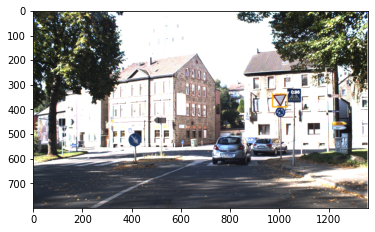

In [7]:
import matplotlib.pyplot as plt
from PIL import Image

image = Image.open('runs/detect/exp5/00001.png')
# image = Image.open('ja_img.png')
print(image.size)
plt.imshow(image)